### Coarse bathymetry SVB - Domain 02 

Longer domain to see if there are any propagaing signals north of south of the bay.

Data from GEBCO Compilation Group (2020) GEBCO 2020 Grid (doi:10.5285/a29c5465-b138-234d-e053-6c86abc040b9).

Domain 1 is bounded by

* north: 30.5 (30.498) N 
* south: 27.0 (26.998) N
* east: -116.5 W
* west -114.0 W

Other considerations
* Bottom depth flattened to -1000 m.
* Land set to 0 m. - fixed small puddles on land.
* Erased some weird artifacts form the measurement tracks.
* No Ojo de Liebre lagoon
* Smoothed 

Grid
* Horizontal resolution: -0.015625 deg (~1.7 km, check!)
* nx=160, ny=224, nz=15, 
* Boundaries open to the N, W and S.

OPEN BOUNDRES

In [21]:
from cartopy import crs as ccrs
import cartopy as cpy
from netCDF4 import Dataset
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as sci_interp
%matplotlib inline

In [22]:
nc_file = '../../bathy/GEBCO_SVB/gebco_2020_n30.5_s26.8231201171875_w-116.5_e-113.7.nc'

with Dataset(nc_file, 'r') as nbl:
    print(nbl.variables)

{'lat': <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    sdn_parameter_urn: SDN:P01::ALATZZ01
    sdn_parameter_name: Latitude north
    sdn_uom_urn: SDN:P06::DEGN
    sdn_uom_name: Degrees north
unlimited dimensions: 
current shape = (882,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lon': <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    sdn_parameter_urn: SDN:P01::ALONZZ01
    sdn_parameter_name: Longitude east
    sdn_uom_urn: SDN:P06::DEGE
    sdn_uom_name: Degrees east
unlimited dimensions: 
current shape = (672,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'elevation': <class 'netCDF4._netCDF4.Variable'>
int16 elevation(lat, lon)
    standard_name: height_above_reference_ellipsoid
    long_name: Elevation relative to sea level
    units: m
    sdn_para

In [23]:
with Dataset(nc_file, 'r') as nbl:
    lat = nbl.variables['lat'][:]
    lon = nbl.variables['lon'][:]
    elev = nbl.variables['elevation'][:]

In [24]:
for ii,lati in zip(range(len(lat)),lat):
    print(ii,lati)

0 26.827083333333334
1 26.831249999999997
2 26.83541666666666
3 26.839583333333337
4 26.84375
5 26.847916666666663
6 26.852083333333326
7 26.856250000000003
8 26.860416666666666
9 26.86458333333333
10 26.86874999999999
11 26.87291666666667
12 26.87708333333333
13 26.881249999999994
14 26.88541666666667
15 26.889583333333334
16 26.893749999999997
17 26.89791666666666
18 26.902083333333337
19 26.90625
20 26.910416666666663
21 26.914583333333326
22 26.918750000000003
23 26.922916666666666
24 26.92708333333333
25 26.93124999999999
26 26.93541666666667
27 26.93958333333333
28 26.943749999999994
29 26.94791666666667
30 26.952083333333334
31 26.956249999999997
32 26.96041666666666
33 26.964583333333337
34 26.96875
35 26.972916666666663
36 26.977083333333326
37 26.981250000000003
38 26.985416666666666
39 26.98958333333333
40 26.99374999999999
41 26.99791666666667
42 27.00208333333333
43 27.006249999999994
44 27.01041666666667
45 27.014583333333334
46 27.018749999999997
47 27.02291666666666
48 

In [25]:
## Set domain corners
lon1 = 0
lon2 = 599
lat1 = 41
lat2 = 881

## Flatten out bottom at 1000 m, land at 0 m
elev[elev > 0] = 0
elev[elev < -1000] = -1000

## Flatten out NE corner in the Gulf of California
elev[lat2-230:lat2+3, lon2-165:lon2+3] = 0

## Remove Ojo de Liebre lagoon
elev[lat1+145:lat1+180, lon2-80:lon2+3] = 0
elev[lat1+180:lat1+210, lon2-80:lon2+3] = 0
elev[lat1+180:lat1+225, lon2-75:lon2+3] = 0


/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


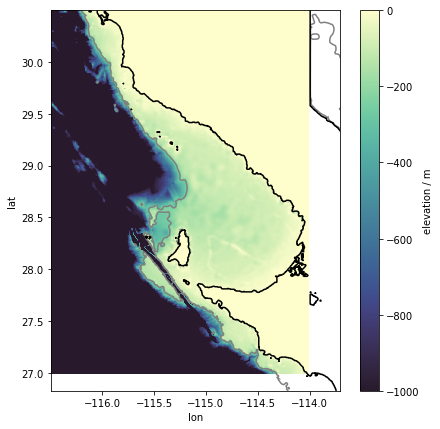

In [26]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
pc = ax.pcolormesh(lon[lon1:lon2],lat[lat1:lat2], elev[lat1:lat2,lon1:lon2], cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc)
cn = ax.contour(lon, lat, -elev, colors='0.5', levels=[250])
cn = ax.contour(lon, lat, -elev, colors='k', levels=[0])
cb.set_label('elevation / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')

ax.set_aspect(1)

**Map above**: Colormesh of proposed domain 1 with land set to 0 m and bottom depth flattened at -1000 m.  Black contour at 0 m depth, gray contour at -250 m depth (shelf break). There are some weird features I need to erase. For example, the track lines (I think they come from the measurement tracks) in the "trench" between the main continental shelf, and multiple coastline features on the southeast coast of the bay that I won't be able to resolve.    

In [27]:
nx = 160
ny = 224

lon_vect = np.round(np.linspace(-116.497,-114.0,nx+1), decimals=5)
lat_vect = np.round(np.linspace(26.998,30.498,ny+1), decimals=5)

f_interp = sci_interp.interp2d(lon,lat,elev)

In [28]:
bathy = f_interp(lon_vect,lat_vect)

/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


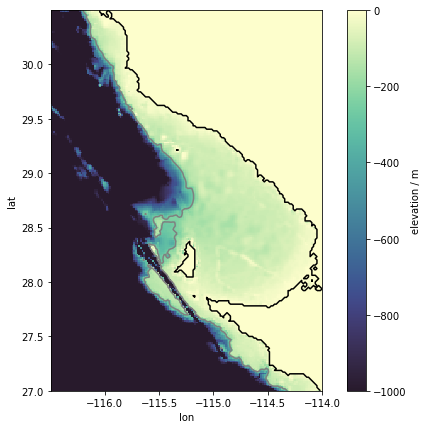

In [29]:
fig, ax = plt.subplots(1,1,figsize=(9,7))
pc = ax.pcolormesh(lon_vect, lat_vect, bathy, cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc)
ax.contour(lon_vect,lat_vect, -bathy, colors='0.5', levels=[250])
ax.contour(lon_vect,lat_vect,  -bathy, colors='k', levels=[0])

cb.set_label('elevation / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')

ax.set_aspect(1)

In [30]:
def smooth(array):
    filtered = (array[:-1,1:]+array[1:,1:]+array[1:,:-1]+array[1:,1:])/4
    return(filtered)

In [31]:
smooth_bathy = (smooth(bathy))

# Add walls 
smooth_bathy[:,-1] = 0 # east
#smooth_bathy[0,:] = 0 # south
#smooth_bathy[-1,:] = 0 # north
#smooth_bathy[:,0] = 0 # west


/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


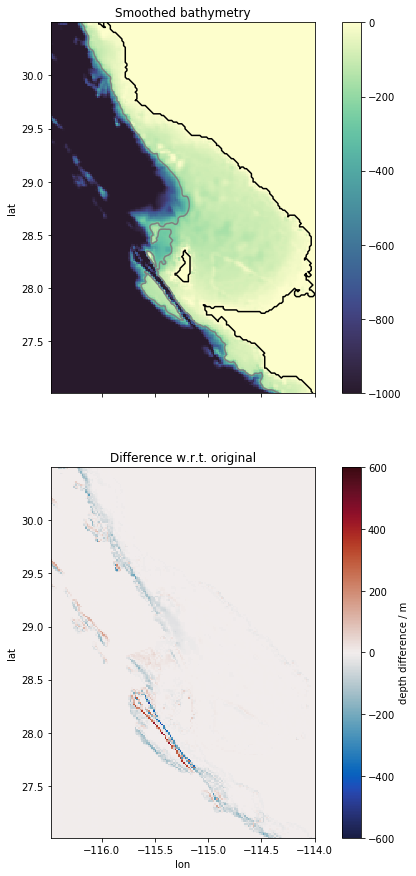

In [32]:
fig, (ax,ax1) = plt.subplots(2,1,figsize=(10,15), sharex=True)
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], smooth_bathy, cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc, ax=ax)
ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='0.5', levels=[250])
ax.contour( lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='k', levels=[0])

pc1 = ax1.pcolormesh(lon_vect[1:], lat_vect[1:],
                     smooth_bathy-bathy[1:,1:], 
                     cmap=cmo.cm.balance, vmin=-600, vmax=600)
cb = plt.colorbar(pc1, ax=ax1)

cb.set_label('depth difference / m')
ax1.set_xlabel('lon')
ax.set_ylabel('lat')
ax1.set_ylabel('lat')
ax.set_title('Smoothed bathymetry')
ax1.set_title('Difference w.r.t. original')
ax.set_aspect(1)
ax1.set_aspect(1)

### Final clean up

Remove 1-cell islands and puddles on land

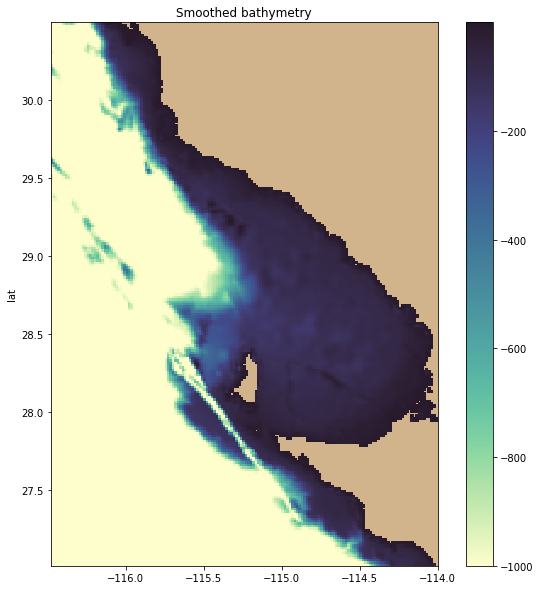

In [41]:
fig, (ax) = plt.subplots(1,1,figsize=(10,10), sharex=True)
mask_smooth = np.ma.masked_values(smooth_bathy,0)
mask = np.ma.getmask(mask_smooth)
ax.set_facecolor('tan')
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], np.ma.masked_array(smooth_bathy, mask=mask), cmap=cmo.cm.deep)
cb = plt.colorbar(pc, ax=ax)
#ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='0.5', levels=[250])
#ax.contour( lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='k', levels=[0])
ax.set_ylabel('lat')
ax.set_title('Smoothed bathymetry')
ax.set_aspect(1)


### Binary file

In [34]:
# Build grid spacing vectors dx and dy 
delx = lon_vect[1:]-lon_vect[:-1]
dely = lat_vect[1:]-lat_vect[:-1]
dx = np.append(delx, [delx[-1]], axis=0) # This is not the best way to do this
dy = np.append(dely, [dely[-1]], axis=0)

In [35]:
dy

array([0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563,
       0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563,
       0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562,
       0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562,
       0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563,
       0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563,
       0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562,
       0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562,
       0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563,
       0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563,
       0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562,
       0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562,
       0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563,
       0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563,
       0.01563, 0.01

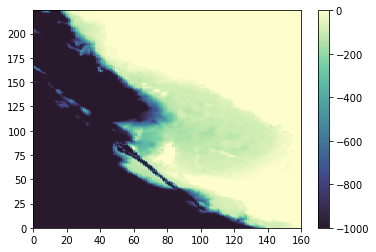

In [36]:
bathy_fname = '160x224/coarse_domain2_SVB_Eclosed_bat.bin'
dx_fname = '160x224/coarse_domain2_SVB_dx.bin'
dy_fname = '160x224/coarse_domain2_SVB_dy.bin'

dt = np.dtype('>f8')  # float 64 big endian

fileobj = open(dx_fname,mode='wb')
dx.astype(dt).tofile(fileobj,"")
fileobj.close()

fileobj = open(dy_fname, mode='wb')
dy.astype(dt).tofile(fileobj,"")
fileobj.close()

fileobj = open(bathy_fname, mode='wb')
dd=smooth_bathy
dd.astype(dt).tofile(fileobj,"")
fileobj.close()

plt.pcolor(dd, cmap=cmo.cm.deep_r)
plt.colorbar()
plt.show()

#### Check that bin file works when read by fortran

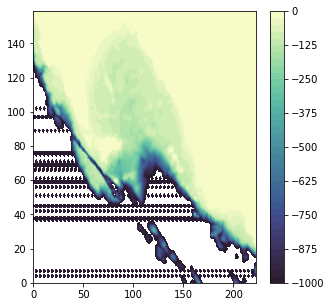

In [37]:
cc=np.fromfile(bathy_fname, dtype=dt)
np.shape(cc)

bF=np.reshape(cc,[nx,ny],'F') # F to read in Fortran order

fig,ax = plt.subplots(1,1, figsize=(5,5))

pc = ax.contourf(bF, 40, cmap=cmo.cm.deep_r)
plt.colorbar(pc,ax=ax)


In [38]:
bF[:,-1]

array([-1.00000000e+03, -1.00000000e+03, -1.00000000e+03, -1.00000000e+03,
       -1.00000000e+03, -7.96615896e+02, -6.28859161e+02, -5.55562757e+02,
       -4.92794642e+02, -6.62224346e+02, -9.31073028e+02, -1.00000000e+03,
       -1.00000000e+03, -1.00000000e+03, -1.00000000e+03, -1.00000000e+03,
       -8.20376318e+02, -5.01670182e+02, -3.03310868e+02, -1.87125665e+02,
       -1.16966477e+02, -7.70798555e+01, -5.19115630e+01, -2.49924000e+01,
       -1.29444024e+01, -2.05735573e+01, -2.50906000e+01, -2.16227637e+01,
       -5.15480000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -3.16007680e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [39]:
ny

224

In [40]:
nx

160